<div class="alert alert-block alert-success">
    <b><center>RECURRENT NEURAL NETWORK</center></b>
    <b><center>RNN 기본 모델들</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
# !pip install mybatis_mapper2sql
import rspy as rsp
rsp.setSystemWarning(off=True)
%matplotlib widget

2021-07-20 14:11:19.225630: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
import os, math
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers, backend, utils

# Prepare Data

In [3]:
data = np.array([
    [[1.], [2.], [3.]],
    [[2.], [3.], [4.]],
    [[3.], [4.], [5.]]
])
label = np.array([
    [6.], [7.], [8.]
])
data.shape, label.shape

((3, 3, 1), (3, 1))

# Single-Layered / Unidirectional & Many-To-One

* Input Data : ( batch size, time_step, input_dim(feature size) )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


2021-07-20 14:11:21.014810: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-07-20 14:11:21.015529: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-07-20 14:11:21.036151: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2021-07-20 14:11:21.036179: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: jupyterlab
2021-07-20 14:11:21.036183: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: jupyterlab
2021-07-20 14:11:21.036283: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.42.1
2021-07-20 14:11:21.036298: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 465.31.0
2021-07-20 14:1

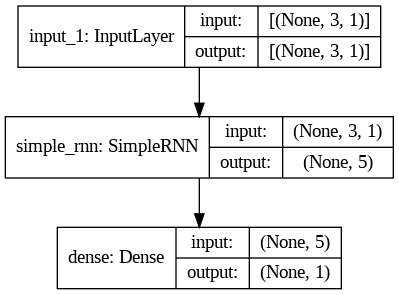

In [4]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [5]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [6]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

2021-07-20 14:11:21.259688: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-20 14:11:21.260218: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


In [7]:
model.predict(data[0:1])

array([[6.148549]], dtype=float32)

In [8]:
model.predict(data)

array([[6.148549],
       [6.892722],
       [7.075982]], dtype=float32)

# Single-Layered / Unidirectional & Many-To-Many

## return_sequences

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3, 5)              35        
_________________________________________________________________
dense_1 (Dense)              (None, 3, 1)              6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


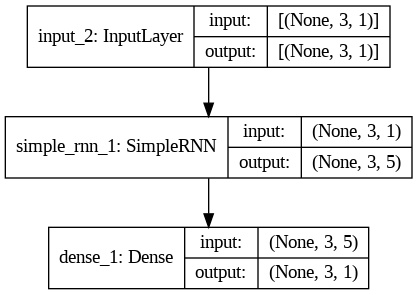

In [10]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences = True),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [11]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [12]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [13]:
model.predict(data[0:1])

array([[[6.363159],
        [5.9116  ],
        [6.964278]]], dtype=float32)

In [14]:
model.predict(data)

array([[[6.363159 ],
        [5.9116   ],
        [6.964278 ]],

       [[7.0647087],
        [6.8580627],
        [7.2737713]],

       [[7.2621155],
        [7.2747097],
        [7.373562 ]]], dtype=float32)

## TimeDistributed

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_35 (SimpleRNN)    (None, 3, 5)              35        
_________________________________________________________________
time_distributed_8 (TimeDist (None, 3, 1)              6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


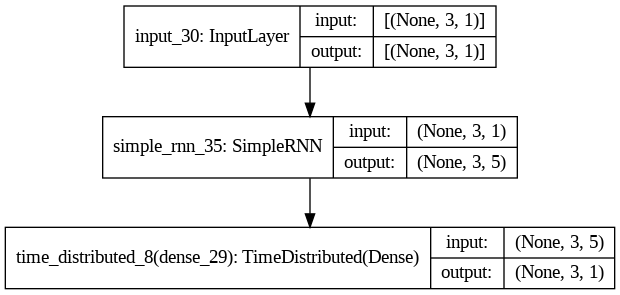

In [114]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences = True),
    layers.TimeDistributed(layers.Dense(1))
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [115]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [116]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [117]:
model.predict(data[0:1])

array([[[6.076257 ],
        [6.7628584],
        [7.1110945]]], dtype=float32)

In [20]:
model.predict(data)

array([[[6.3937683],
        [6.0443077],
        [6.077416 ]],

       [[7.233896 ],
        [6.908901 ],
        [7.2498755]],

       [[7.526754 ],
        [7.443875 ],
        [7.630796 ]]], dtype=float32)

## Using Backend

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 3, 5)              35        
_________________________________________________________________
lambda (Lambda)              (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


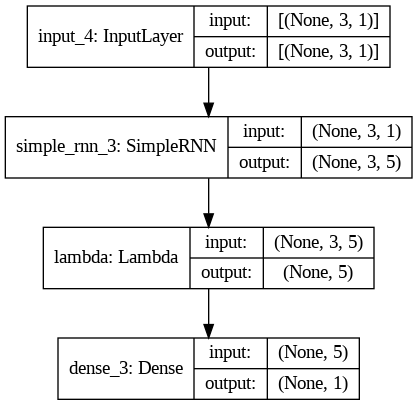

In [22]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences = True),
    layers.Lambda(lambda x: backend.mean(x, axis=1)),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [23]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [24]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [25]:
model.predict(data[0:1])

array([[6.3023715]], dtype=float32)

In [26]:
model.predict(data)

array([[6.3023715],
       [7.0369925],
       [7.4857574]], dtype=float32)

## Using Lambda Function

In [88]:
@tf.function
def sequences_sum(x):
    return tf.reduce_mean(x, axis=1)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_22 (SimpleRNN)    (None, 3, 5)              35        
_________________________________________________________________
lambda_7 (Lambda)            (None, 5)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


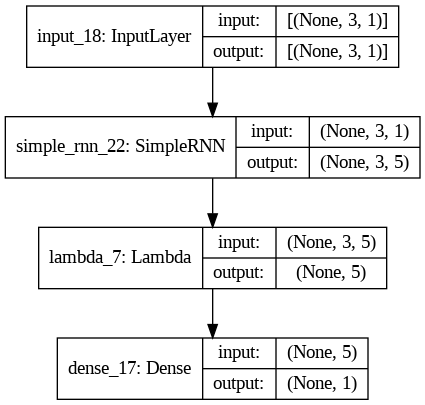

In [89]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences = True),
    layers.Lambda(lambda x: sequences_sum(x)),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [78]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [79]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [80]:
model.predict(data[0:1])

array([[6.465347]], dtype=float32)

In [81]:
model.predict(data)

array([[6.465347 ],
       [7.0263004],
       [7.22963  ]], dtype=float32)

# Single-Layered / Bidirectional & Many-To-One

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_9 (Bidirection (None, 10)                70        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


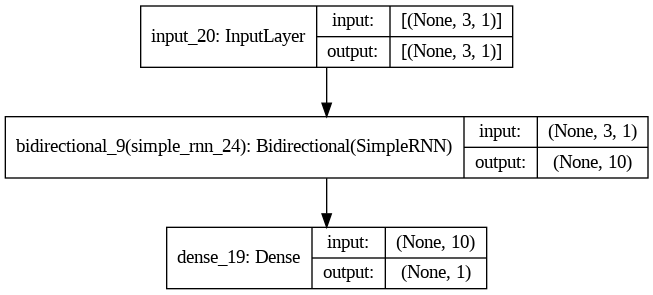

In [91]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.Bidirectional(layers.SimpleRNN(5), merge_mode="concat"),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [34]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [35]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [36]:
model.predict(data)

array([[5.934442 ],
       [7.198704 ],
       [7.8188033]], dtype=float32)

# Single-Layered / Bidirectional & Many-To-Many

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_15 (Bidirectio (None, 3, 10)             70        
_________________________________________________________________
time_distributed_6 (TimeDist (None, 3, 1)              11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


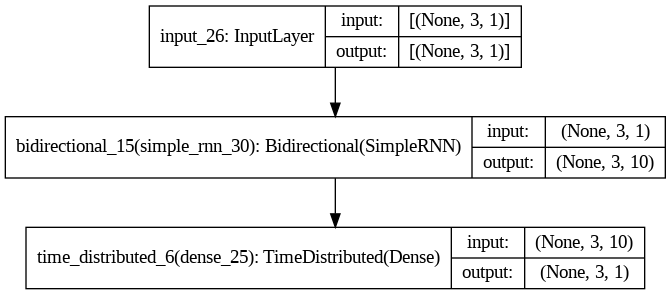

In [103]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.Bidirectional(layers.SimpleRNN(5, return_sequences=True), merge_mode="concat"),
    layers.TimeDistributed(layers.Dense(1))
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [104]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [105]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [106]:
model.predict(data[0:1])

array([[[6.003092],
        [5.973625],
        [6.107971]]], dtype=float32)

In [107]:
model.predict(data)

array([[[6.003092 ],
        [5.973625 ],
        [6.107971 ]],

       [[7.1468143],
        [7.0570726],
        [7.156521 ]],

       [[7.746888 ],
        [7.7078075],
        [7.682767 ]]], dtype=float32)

# Multi-Layered / Unidirectional & Many-To-One

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_31 (SimpleRNN)    (None, 3, 5)              35        
_________________________________________________________________
simple_rnn_32 (SimpleRNN)    (None, 5)                 55        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


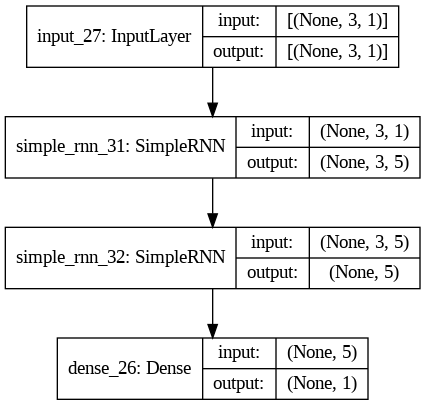

In [108]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences=True),
    layers.SimpleRNN(5),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [109]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [110]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [111]:
model.predict(data)

array([[6.9932165],
       [6.993812 ],
       [6.9939384]], dtype=float32)

# Multi-Layered / Bidirectional & Many-To-One

## Unidirectional > Bidirectional

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_9 (SimpleRNN)     (None, 3, 5)              35        
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


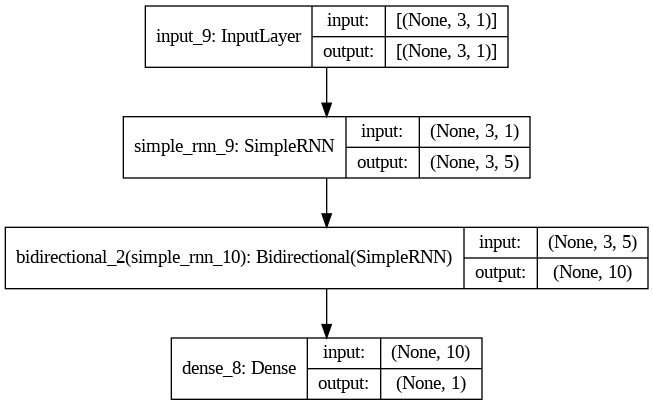

In [49]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences=True),
    layers.Bidirectional(layers.SimpleRNN(5), merge_mode="concat"),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [50]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [51]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [52]:
model.predict(data)

array([[5.9998612],
       [7.000541 ],
       [7.999354 ]], dtype=float32)

## Bidirectional > Bidirectional

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 3, 10)             70        
_________________________________________________________________
bidirectional_4 (Bidirection (None, 10)                160       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


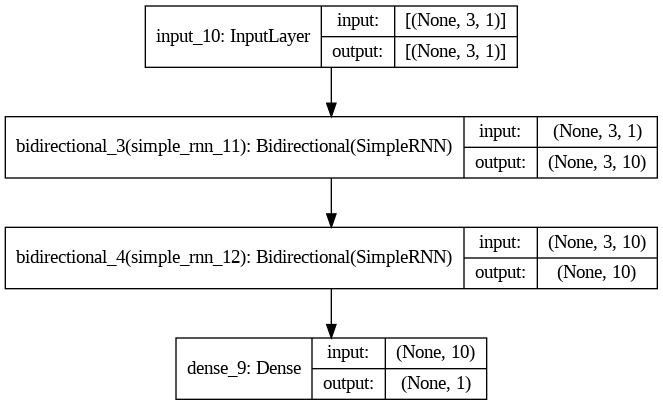

In [54]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.Bidirectional(layers.SimpleRNN(5, return_sequences=True), merge_mode="concat"),
    layers.Bidirectional(layers.SimpleRNN(5)),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [55]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [56]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [57]:
model.predict(data)

array([[6.0000625],
       [7.0022874],
       [7.9921384]], dtype=float32)

# Multi-Layered / Bidirectional & Many-To-Many

## Unidirectional > Bidirectional

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_13 (SimpleRNN)    (None, 3, 5)              35        
_________________________________________________________________
bidirectional_5 (Bidirection (None, 3, 10)             110       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 3, 1)              11        
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


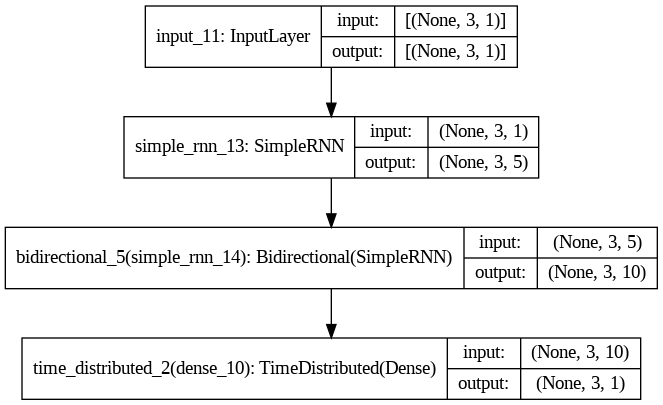

In [59]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences=True),
    layers.Bidirectional(layers.SimpleRNN(5, return_sequences=True), merge_mode="concat"),
    layers.TimeDistributed(layers.Dense(1))
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [60]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [61]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [62]:
model.predict(data)

array([[[5.912203 ],
        [6.0087256],
        [5.9628315]],

       [[7.3058085],
        [7.0915613],
        [7.14562  ]],

       [[7.811697 ],
        [7.8496203],
        [7.852608 ]]], dtype=float32)

## Bidirectional > Bidirectional

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 3, 10)             70        
_________________________________________________________________
bidirectional_7 (Bidirection (None, 3, 10)             160       
_________________________________________________________________
time_distributed_3 (TimeDist (None, 3, 1)              11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


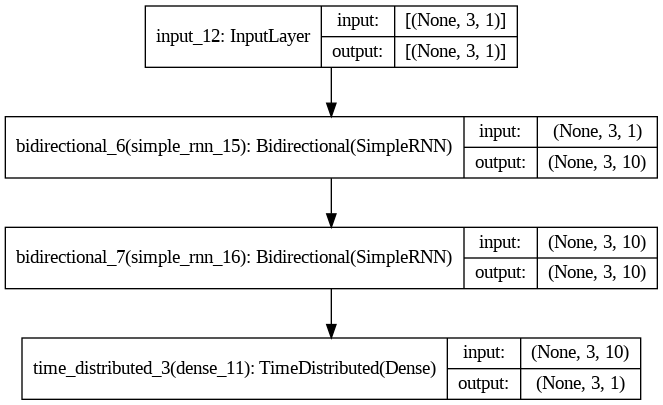

In [64]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.Bidirectional(layers.SimpleRNN(5, return_sequences=True), merge_mode="concat"),
    layers.Bidirectional(layers.SimpleRNN(5, return_sequences=True), merge_mode="concat"),
    layers.TimeDistributed(layers.Dense(1))
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [65]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [66]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [67]:
model.predict(data)

array([[[5.93161  ],
        [6.0189285],
        [5.9984536]],

       [[7.18212  ],
        [6.9849544],
        [7.040377 ]],

       [[7.8333516],
        [7.9497294],
        [7.85375  ]]], dtype=float32)